In [1]:
#Request API key from Tiingo.Import Tiingo modules and configure API key
import tiingo
from tiingo import TiingoClient
from urllib.error import HTTPError
from tiingo.restclient import (RestClient, RestClientError)
from stockstats import StockDataFrame
config = {}
config['session'] = True
config['api_key'] = "15de2606da16a6f16273d8ebf1c3aef0fe28dfc6"
client = TiingoClient(config)
sort=True #This prevents a message from popping up that asks you set the default for a sorting function

#Import modules (not all of these are necessary)
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from datetime import datetime, timedelta
from decimal import *
import ast, math, calendar, time

#Enable displaying full range for dataframes
import logging, sys
logging.disable(sys.maxsize)
#logging.disable(logging.NOTSET) #uncomment to return to deafult. Only a portion of the beginning and end of dataframes will be displayed.

date = (datetime.now().strftime('%m-%d-%Y')) #Set a variable for the date that corresponds to the stock market data



In [4]:
#Function similar to Species Function except is used at the end of day to calcuate how well each stock performed after download
def Perform(date=date,edition=''):
    species = pd.read_csv(r'C:\Users\USER\OneDrive\QT-1\QT-1_Excel_data-set\QT-1.2 exports\QT1-1.7_TopSpecies\TopSpecies_%s%s.csv' % (date,edition))
    stocks= species.iloc[0:-1,1].to_list()   
    freq = '1min'
    strt=date; end=date
    print('start/end',strt,'/',end)
    data = client.get_dataframe(stocks,
                                          frequency=freq,
                                          metric_name='close',
                                          startDate=strt,
                                          endDate=end)

    print('end tiingo')
    for tick in list(range(species.shape[0])):    

        rates=[];rate_sp=[];fin_rate=[]
        species_int = (60,90) #Interval to establish species

        #############################################################################################################################################
        ret=[]; ret_end = 350; rate_min=[];rate_max=[]; FRN=[]
        species_ret = (90,ret_end) #Interval to calculate species' return rate
        #############################################################################################################################################

        for n in list(range(data.shape[1])):
            data_list = data.values[:,n] # 0 is first element in df data
            cum_rate=[]; cum_rate_spi=[]; cum=0; cum_sp=0
            cum_rate_ret=[]; cum_rt=0
    
            for n in list(range(data.shape[0] -1)):
                rate_i=( 100* ((data_list[n+1])-(data_list[n])) /(data_list[n])) # 100* (close-prev_close) / prev_close
                ######################################
                if math.isnan(rate_i) == True:
                    rate_i=0
                ######################################    
                cum+=rate_i
                cum_rate.append(cum)  

            for n in list(range(species_int[1]-species_int[0])):
                rate_spi=( 100* ((data_list[n+1+species_int[0]])-(data_list[n+species_int[0]])) /(data_list[n+species_int[0]]))
                cum_sp+=rate_spi
                cum_rate_spi.append(cum_sp)

            rates.append(np.mean(list(filter(lambda num: num != 0, cum_rate_spi)))) #calculate rate for species
            fin_rate.append(cum_sp)

            #############################################################################################################################################
            #cumulative rate from the period at the end of species to the day's end (or specified timepoint of return on investment (ret/rt))
            for n in list(range(species_ret[1]-species_ret[0])):
                rate_ret=( 100* ((data_list[n+1+species_ret[0]])-(data_list[n+species_ret[0]])) /(data_list[n+species_ret[0]]))
                cum_rt+=rate_ret
                cum_rate_ret.append(cum_rt)
            FRN.append(cum_rate_ret[-1])
            ret.append(np.mean(list(filter(lambda num: num != 0,cum_rate_ret))))
            rate_min.append(np.min(cum_rate_ret))
            rate_max.append(np.max(cum_rate_ret))
            #############################################################################################################################################

            plt.plot(cum_rate)#, label=keys_df[n])
    plt.title('Cumulative Rate for Entire Quartile')
    plt.ylabel('% change in closing price')
    plt.xlabel('Time (min)')
    plt.axvline(x=species_int[0], c='g', linestyle='--'); plt.axvline(x=species_int[1], c='g', linestyle='-')
    plt.axvline(x=ret_end, c='k', linestyle='--'); plt.show()

    #Data frames for concatenation
    FRN=pd.DataFrame({'FinRtrn' : FRN})
    MRN=pd.DataFrame({'MeanRtrn' : ret})
    RMN=pd.DataFrame({'MinRtrn' : rate_min})
    RMX=pd.DataFrame({'MaxRtrn' : rate_max})

    perform=pd.concat([species,FRN,MRN,RMN,RMX], axis=1, join='inner')

    #################################################################
    N_top=3
    top_sp=perform.iloc[0:N_top]['Stocks'].to_list()
    top=data[top_sp]

    #Similar to above
    for N in list(range(top.shape[1])):
        cum_rate=[]; cum_rate_spi=[]; cum=0; cum_sp=0
        data_list = top.values[:,N]
        for n in list(range(top.shape[0] -1)):
            rate_i=( 100* ((data_list[n+1])-(data_list[n])) /(data_list[n])) # 100* (close-prev_close) / prev_close
            if math.isnan(rate_i) == True:
                rate_i=0
            cum+=rate_i; cum_rate.append(cum) 
        plt.plot(cum_rate, label=top_sp[N])
    plt.title('Cumulative Rate for Top Species'); plt.ylabel('% change in closing price'); plt.xlabel('Time (min)')
    plt.axvline(x=species_int[0], c='g', linestyle='--'); plt.axvline(x=species_int[1], c='g', linestyle='-')
    plt.axvline(x=ret_end, c='k', linestyle='--'); plt.legend(loc="upper left"); plt.show()
    perform.to_csv(r'C:\Users\USER\OneDrive\QT-1\QT-1_Excel_data-set\QT-1.2 exports\QT1-1.7_SpeciesPerformance\Performance_%s%s.csv' % (date,edition), index=False)


start/end 06-12-2020 / 06-12-2020
end tiingo


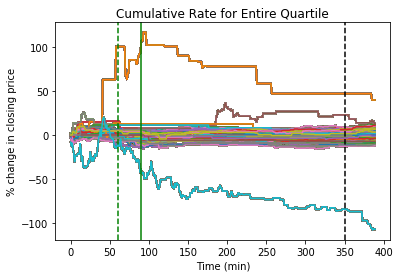

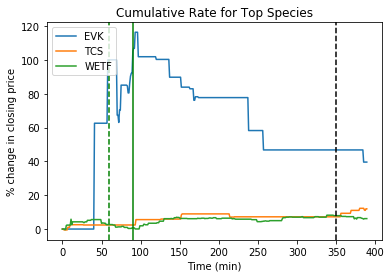

In [6]:
Perform(date, edition=' (6)')